In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba
#Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
import sys
sys.executable

'/Users/raghav/opt/anaconda3/bin/python'

In [3]:
# Load the Data
df_life = pd.read_csv('/Users/raghav/Downloads/final1.csv')
df_life.head()

df_life.columns = df_life.columns.str.strip()

df_life = df_life.drop(columns=['Unnamed: 0'])

df_life.groupby(['Sex','Age_Group','Period'])['ex - expectation of life at age x'].mean().reset_index()

,Sex,Age_Group,Period,ex - expectation of life at age x
0,Female,1-4 years,2000,76.510909
1,Female,1-4 years,2005,77.367273
2,Female,1-4 years,2010,78.497273
3,Female,1-4 years,2015,79.221818
4,Female,1-4 years,2019,79.922727
...,...,...,...,...
185,Male,<1 year,2000,70.239091
186,Male,<1 year,2005,71.396364
187,Male,<1 year,2010,72.820909
188,Male,<1 year,2015,74.035455


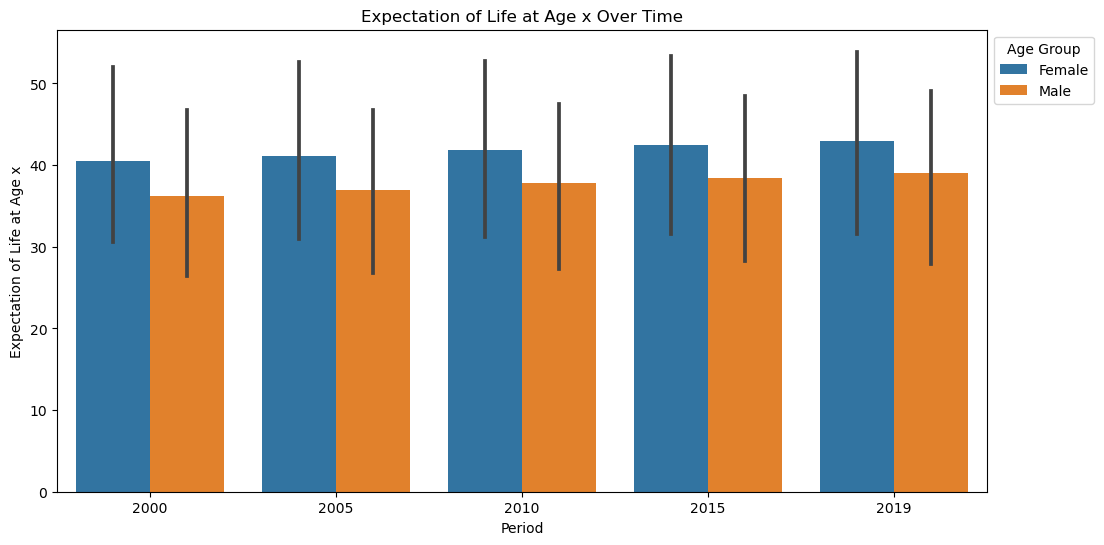

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data
df_life = pd.read_csv('final1.csv')
df_life.columns = df_life.columns.str.strip()
df_life = df_life.drop(columns=['Unnamed: 0'])

# Group by 'Sex', 'Age_Group', and 'Period' and calculate the mean of 'ex - expectation of life at age x'
grouped_data = df_life.groupby(['Sex', 'Age_Group', 'Period'])['ex - expectation of life at age x'].mean().reset_index()

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Period', y='ex - expectation of life at age x', hue='Sex', data=grouped_data)

# Set plot labels and title
plt.xlabel('Period')
plt.ylabel('Expectation of Life at Age x')
plt.title('Expectation of Life at Age x Over Time')

# Show the legend
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show() 


In [5]:
#df_life.drop(columns=['Region_Code','SpatialDimValueCode'],inplace=True)
#df_life
cat_cols= ['Period','Sex','Age_Group']
# Convert selected columns to categorical
df_life[cat_cols] = df_life[cat_cols].astype('category')
df_life.columns = df_life.columns.str.strip()

# Remove '$', spaces, and commas from 'GDP' and convert to float
df_life['GDP'] = df_life['GDP'].replace('[\$,]', '', regex=True).astype(float)

df_life['GDP'].astype('float64')
# Check the result
df_life.info()

#df_life['GDP_Change'] = df_life['']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Region_Code                                           2090 non-null   object  
 1   SpatialDimValueCode                                   2090 non-null   object  
 2   Location                                              2090 non-null   object  
 3   Period                                                2090 non-null   category
 4   Sex                                                   2090 non-null   category
 5   Age_Group                                             2090 non-null   category
 6   Tx - person-years lived above age x                   2090 non-null   float64 
 7   ex - expectation of life at age x                     2090 non-null   float64 
 8   lx - number of people left alive at age x       

In [6]:
import pandas as pd

# Assuming your DataFrame df_life has columns 'Location', 'GDP', and 'Period'

# Convert 'Period' to a datetime object if it's not already
df_life['Period'] = pd.to_datetime(df_life['Period'], format='%Y')

# Filter data for the years 2000 and 2019
df_gdp_change = df_life[(df_life['Period'].dt.year == 2019) | (df_life['Period'].dt.year == 2000)]

# Pivot the DataFrame to have one row per country with GDP for both years
df_gdp_change = pd.pivot_table(df_gdp_change, index='Location', columns='Period', values='GDP', aggfunc='first')

# Calculate the change in GDP between 2019 and 2000
df_gdp_change['GDP_Change'] = df_gdp_change[pd.to_datetime('2019-01-01')] - df_gdp_change[pd.to_datetime('2000-01-01')]

# Reset index to make 'Location' a regular column
df_gdp_change.reset_index(inplace=True)

# Merge the calculated GDP change back into the original DataFrame
df_life = pd.merge(df_life, df_gdp_change[['Location', 'GDP_Change']], on='Location', how='left')

# Display the resulting DataFrame with the new 'GDP_Change' column
df_life


,Region_Code,SpatialDimValueCode,Location,Period,Sex,Age_Group,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,GDP_Change
0,AMR,BRA,Brazil,2000-01-01,Female,1-4 years,7420561.0,76.18,97402.0,388666.0,0.0010,392.3,0.004,1.653572e+12,1.426476e+12
1,AMR,BRA,Brazil,2000-01-01,Female,10-14 years,6547182.0,67.58,96875.0,484035.0,0.0003,137.0,0.001,1.653572e+12,1.426476e+12
2,AMR,BRA,Brazil,2000-01-01,Female,15-19 years,6063147.0,62.68,96739.0,483101.0,0.0005,236.7,0.002,1.653572e+12,1.426476e+12
3,AMR,BRA,Brazil,2000-01-01,Female,20-24 years,5580047.0,57.82,96502.0,481748.0,0.0006,304.5,0.003,1.653572e+12,1.426476e+12
4,AMR,BRA,Brazil,2000-01-01,Female,25-29 years,5098299.0,53.00,96197.0,480046.0,0.0008,376.4,0.004,1.653572e+12,1.426476e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,WPR,JPN,Japan,2019-01-01,Male,70-74 years,1345405.0,15.97,84223.0,402477.0,0.0190,7455.0,0.089,5.036891e+12,2.017770e+11
2086,WPR,JPN,Japan,2019-01-01,Male,75-79 years,942929.0,12.28,76768.0,354743.0,0.0330,11638.0,0.150,5.036891e+12,2.017770e+11
2087,WPR,JPN,Japan,2019-01-01,Male,80-84 years,588185.0,9.03,65130.0,282238.0,0.0620,17364.0,0.270,5.036891e+12,2.017770e+11
2088,WPR,JPN,Japan,2019-01-01,Male,85+ years,305948.0,6.41,47765.0,305948.0,0.1400,47765.0,1.000,5.036891e+12,2.017770e+11


In [7]:

periods = df_life['Period'].values
periods =  set(periods)

metrics = [
    'Tx - person-years lived above age x',
    'ex - expectation of life at age x',
    'lx - number of people left alive at age x',
    'nLx - person-years lived between ages x and x+n',
    'nMx - age-specific death rate between ages x and x+n',
    'ndx - number of people dying between ages x and x+n',
    'nqx - probability of dying between ages x and x+n',
    'GDP'
]

df_life_agg = df_life.groupby('Location')[[
    'Tx - person-years lived above age x',
    'ex - expectation of life at age x',
    'lx - number of people left alive at age x',
    'nLx - person-years lived between ages x and x+n',
    'nMx - age-specific death rate between ages x and x+n',
    'ndx - number of people dying between ages x and x+n',
    'nqx - probability of dying between ages x and x+n',
    'GDP','GDP_Change'
]].mean().reset_index()

df_life_agg=df_life_agg.set_index('Location')
display(df_life_agg)


,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,GDP_Change
Location,,,,,,,,,
Brazil,3.657721e+06,39.025526,84769.231579,389437.178947,0.022701,5263.169000,0.107768,2.511533e+12,1.426476e+12
China,3.688506e+06,38.750474,86079.442105,394046.878947,0.027371,5263.174368,0.113148,1.325581e+13,1.483755e+13
France,4.185679e+06,43.172053,90993.642105,425532.178947,0.015344,5263.148895,0.087720,2.554045e+12,8.182432e+11
Germany,4.088138e+06,42.149053,90346.331579,420462.252632,0.017391,5263.178737,0.094202,3.661226e+12,1.239840e+12
India,3.169920e+06,35.537211,77791.121053,352272.694737,0.031541,5263.153158,0.131921,5.569112e+12,6.911961e+12
Indonesia,3.292043e+06,35.872842,80393.300000,364863.978947,0.030481,5263.153684,0.129779,1.912956e+12,2.343957e+12
Japan,4.334453e+06,44.427632,92420.436842,434906.500000,0.013876,5263.173684,0.084297,5.050315e+12,2.017770e+11
Mexico,3.762973e+06,40.040053,85695.131579,396266.252632,0.019330,5263.155789,0.103468,1.939677e+12,9.217369e+11
Russian Federation,3.222224e+06,34.745316,79838.905263,362473.036842,0.029788,5263.161421,0.134869,2.981642e+12,2.715232e+12


In [8]:
df_life_agg_norm = (df_life_agg - df_life_agg.mean()) / df_life_agg.std()


In [9]:
#Apply kMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_life_agg_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_life_agg_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Brazil, Mexico
1 :  India, Indonesia, Russian Federation
2 :  France, Germany, Japan, United Kingdom of Great Britain and Northern Ireland
3 :  China, United States of America


In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_life_agg_norm.columns)

#Add 'Cluster number' column

pd.set_option('display.precision', 3)
print(centroids)
#pd.set_option('display.precision', 3)

   Tx - person-years lived above age x  ex - expectation of life at age x  \
0                               -0.138                             -0.060   
1                               -1.334                             -1.331   
2                                1.007                              0.992   
3                                0.125                              0.072   

   lx - number of people left alive at age x  \
0                                     -0.173   
1                                     -1.357   
2                                      0.990   
3                                      0.228   

   nLx - person-years lived between ages x and x+n  \
0                                           -0.159   
1                                           -1.341   
2                                            1.000   
3                                            0.171   

   nMx - age-specific death rate between ages x and x+n  \
0                                          

<Figure size 800x700 with 0 Axes>

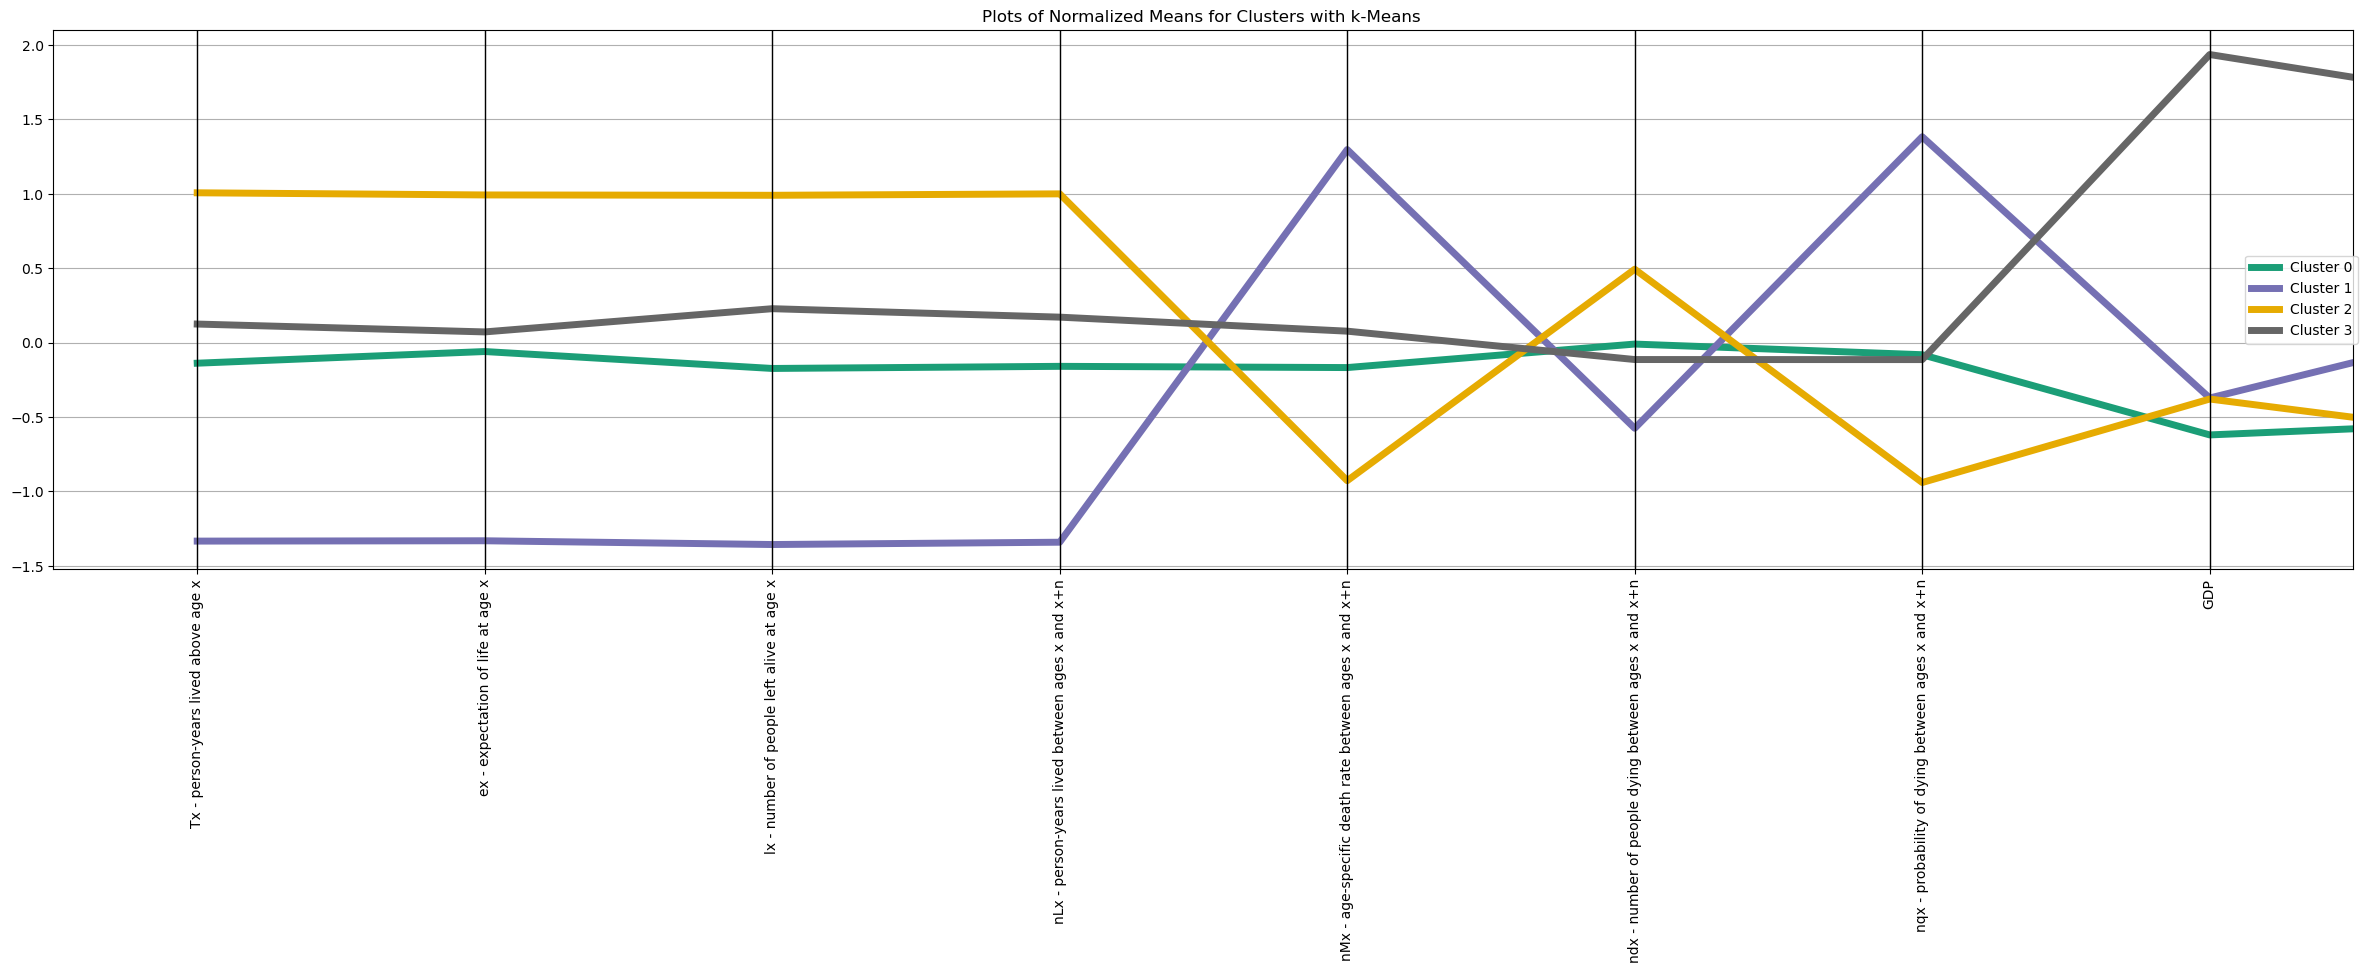

In [11]:
#Plot the means from kMeans clustering

# Create data frame with means of each normalized input variable (measurement) for each cluster 
df_life_agg_norm.index = df_life_agg.index
clust_mean_norm = df_life_agg_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(8, 7))
fig = plt.figure(figsize=(8, 7))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5, 7.5)
plt.title('Plots of Normalized Means for Clusters with k-Means ')

# Rotate the cluster labels vertically
plt.xticks(rotation='vertical')

plt.show()


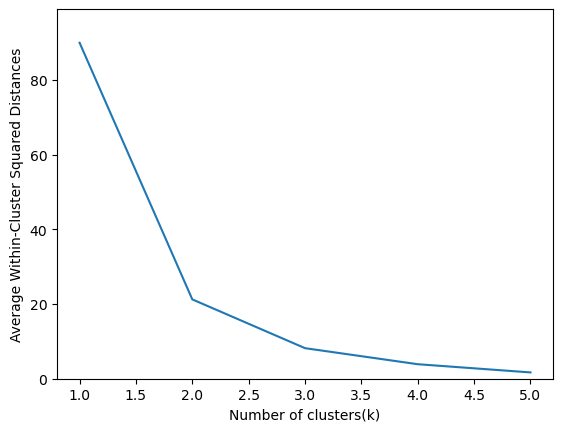

In [12]:
inertia = []
for n_clusters in range(1, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_life_agg_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 6), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [13]:
import pandas as pd

# Assuming pd_comm is your DataFrame
df_comm = pd.read_csv('non-communicable_diseases.csv')

# Combine column names with the values in the first row to create filenames
file_names = df_comm.columns + '_' + df_comm.iloc[0].astype(str)

# Set the generated filenames as the new column names
df_comm.columns = file_names

# Drop the first row since it's used for generating filenames
df_comm = df_comm[1:]

# Display the DataFrame with updated column names

cols = [
       'FactValueNumeric_Cardiovascular diseases',
       'FactValueNumeric.1_Diabetes mellitus',
       'FactValueNumeric.2_Malignant neoplasms',
       'FactValueNumeric.3_Respiratory diseases',
       'FactValueNumericHigh_Cardiovascular diseases',
       'FactValueNumericHigh.1_Diabetes mellitus',
       'FactValueNumericHigh.2_Malignant neoplasms',
       'FactValueNumericHigh.3_Respiratory diseases',
       'FactValueNumericLow_Cardiovascular diseases',
       'FactValueNumericLow.1_Diabetes mellitus',
       'FactValueNumericLow.2_Malignant neoplasms',
       'FactValueNumericLow.3_Respiratory diseases']


In [14]:
# Step 1: Identify columns causing the error
cols = [
       'FactValueNumeric_Cardiovascular diseases',
       'FactValueNumeric.1_Diabetes mellitus',
       'FactValueNumeric.2_Malignant neoplasms',
       'FactValueNumeric.3_Respiratory diseases',
       'FactValueNumericHigh_Cardiovascular diseases',
       'FactValueNumericHigh.1_Diabetes mellitus',
       'FactValueNumericHigh.2_Malignant neoplasms',
       'FactValueNumericHigh.3_Respiratory diseases',
       'FactValueNumericLow_Cardiovascular diseases',
       'FactValueNumericLow.1_Diabetes mellitus',
       'FactValueNumericLow.2_Malignant neoplasms',
       'FactValueNumericLow.3_Respiratory diseases']


# Step 2: Convert columns to numeric
df_comm[cols] = df_comm[cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Handle missing values (if needed)
# For example, drop rows with NaN
df_comm.dropna(subset=cols, inplace=True)

# Now, proceed with your groupby and aggregation
df_comm_agg = df_comm.groupby('Location_nan')[cols].mean().reset_index()
df_comm_agg = df_comm_agg.set_index('Location_nan')
df_comm_agg.index.name = 'Location'

# Display the resulting DataFrame
display(df_comm_agg)
display(df_life_agg)

,FactValueNumeric_Cardiovascular diseases,FactValueNumeric.1_Diabetes mellitus,FactValueNumeric.2_Malignant neoplasms,FactValueNumeric.3_Respiratory diseases,FactValueNumericHigh_Cardiovascular diseases,FactValueNumericHigh.1_Diabetes mellitus,FactValueNumericHigh.2_Malignant neoplasms,FactValueNumericHigh.3_Respiratory diseases,FactValueNumericLow_Cardiovascular diseases,FactValueNumericLow.1_Diabetes mellitus,FactValueNumericLow.2_Malignant neoplasms,FactValueNumericLow.3_Respiratory diseases
Location,,,,,,,,,,,,
Brazil,5.083e+05,83587.600,2.849e+05,1.199e+05,5.665e+05,95786.425,3.196e+05,1.375e+05,4.447e+05,70712.050,2.513e+05,1.015e+05
China,5.446e+06,282024.150,3.243e+06,1.705e+06,6.231e+06,351874.425,3.801e+06,1.991e+06,4.651e+06,219104.825,2.639e+06,1.413e+06
France,2.297e+05,18314.325,2.491e+05,4.429e+04,2.769e+05,22372.000,3.008e+05,5.973e+04,1.781e+05,14429.350,2.015e+05,3.291e+04
Germany,5.268e+05,35535.600,3.357e+05,7.872e+04,6.235e+05,44105.850,3.914e+05,9.965e+04,4.329e+05,27732.675,2.750e+05,6.331e+04
India,3.104e+06,390729.700,1.029e+06,1.467e+06,3.801e+06,491683.900,1.271e+06,1.923e+06,2.495e+06,303056.050,8.287e+05,1.020e+06
Indonesia,8.055e+05,138246.775,2.568e+05,1.432e+05,1.022e+06,176904.075,3.533e+05,1.865e+05,6.087e+05,104503.025,1.777e+05,1.063e+05
Japan,5.065e+05,21544.575,5.392e+05,1.343e+05,5.807e+05,28117.600,5.940e+05,1.848e+05,3.976e+05,14907.675,4.536e+05,8.765e+04
Mexico,2.031e+05,119493.700,1.054e+05,4.905e+04,2.253e+05,139564.900,1.196e+05,5.629e+04,1.768e+05,99805.275,9.263e+04,3.956e+04
Russian Federation,1.767e+06,23454.750,4.761e+05,6.772e+04,1.901e+06,27436.400,5.114e+05,7.791e+04,1.590e+06,20198.150,4.360e+05,6.177e+04


,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,GDP_Change
Location,,,,,,,,,
Brazil,3.658e+06,39.026,84769.232,389437.179,0.023,5263.169,0.108,2.512e+12,1.426e+12
China,3.689e+06,38.750,86079.442,394046.879,0.027,5263.174,0.113,1.326e+13,1.484e+13
France,4.186e+06,43.172,90993.642,425532.179,0.015,5263.149,0.088,2.554e+12,8.182e+11
Germany,4.088e+06,42.149,90346.332,420462.253,0.017,5263.179,0.094,3.661e+12,1.240e+12
India,3.170e+06,35.537,77791.121,352272.695,0.032,5263.153,0.132,5.569e+12,6.912e+12
Indonesia,3.292e+06,35.873,80393.300,364863.979,0.030,5263.154,0.130,1.913e+12,2.344e+12
Japan,4.334e+06,44.428,92420.437,434906.500,0.014,5263.174,0.084,5.050e+12,2.018e+11
Mexico,3.763e+06,40.040,85695.132,396266.253,0.019,5263.156,0.103,1.940e+12,9.217e+11
Russian Federation,3.222e+06,34.745,79838.905,362473.037,0.030,5263.161,0.135,2.982e+12,2.715e+12


In [15]:
# Assuming df_life_agg and df_comm_agg are your DataFrames
# If they are not already set_index, you can do it before merging

# Merge DataFrames on the index
result_df = pd.merge(df_life_agg, df_comm_agg, how='outer', left_index=True, right_index=True)


# Display the resulting DataFrame
display(result_df)


,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,GDP_Change,FactValueNumeric_Cardiovascular diseases,...,FactValueNumeric.2_Malignant neoplasms,FactValueNumeric.3_Respiratory diseases,FactValueNumericHigh_Cardiovascular diseases,FactValueNumericHigh.1_Diabetes mellitus,FactValueNumericHigh.2_Malignant neoplasms,FactValueNumericHigh.3_Respiratory diseases,FactValueNumericLow_Cardiovascular diseases,FactValueNumericLow.1_Diabetes mellitus,FactValueNumericLow.2_Malignant neoplasms,FactValueNumericLow.3_Respiratory diseases
Location,,,,,,,,,,,,,,,,,,,,,
Brazil,3.658e+06,39.026,84769.232,389437.179,0.023,5263.169,0.108,2.512e+12,1.426e+12,5.083e+05,...,2.849e+05,1.199e+05,5.665e+05,95786.425,3.196e+05,1.375e+05,4.447e+05,70712.050,2.513e+05,1.015e+05
China,3.689e+06,38.750,86079.442,394046.879,0.027,5263.174,0.113,1.326e+13,1.484e+13,5.446e+06,...,3.243e+06,1.705e+06,6.231e+06,351874.425,3.801e+06,1.991e+06,4.651e+06,219104.825,2.639e+06,1.413e+06
France,4.186e+06,43.172,90993.642,425532.179,0.015,5263.149,0.088,2.554e+12,8.182e+11,2.297e+05,...,2.491e+05,4.429e+04,2.769e+05,22372.000,3.008e+05,5.973e+04,1.781e+05,14429.350,2.015e+05,3.291e+04
Germany,4.088e+06,42.149,90346.332,420462.253,0.017,5263.179,0.094,3.661e+12,1.240e+12,5.268e+05,...,3.357e+05,7.872e+04,6.235e+05,44105.850,3.914e+05,9.965e+04,4.329e+05,27732.675,2.750e+05,6.331e+04
India,3.170e+06,35.537,77791.121,352272.695,0.032,5263.153,0.132,5.569e+12,6.912e+12,3.104e+06,...,1.029e+06,1.467e+06,3.801e+06,491683.900,1.271e+06,1.923e+06,2.495e+06,303056.050,8.287e+05,1.020e+06
Indonesia,3.292e+06,35.873,80393.300,364863.979,0.030,5263.154,0.130,1.913e+12,2.344e+12,8.055e+05,...,2.568e+05,1.432e+05,1.022e+06,176904.075,3.533e+05,1.865e+05,6.087e+05,104503.025,1.777e+05,1.063e+05
Japan,4.334e+06,44.428,92420.437,434906.500,0.014,5263.174,0.084,5.050e+12,2.018e+11,5.065e+05,...,5.392e+05,1.343e+05,5.807e+05,28117.600,5.940e+05,1.848e+05,3.976e+05,14907.675,4.536e+05,8.765e+04
Mexico,3.763e+06,40.040,85695.132,396266.253,0.019,5263.156,0.103,1.940e+12,9.217e+11,2.031e+05,...,1.054e+05,4.905e+04,2.253e+05,139564.900,1.196e+05,5.629e+04,1.768e+05,99805.275,9.263e+04,3.956e+04
Russian Federation,3.222e+06,34.745,79838.905,362473.037,0.030,5263.161,0.135,2.982e+12,2.715e+12,1.767e+06,...,4.761e+05,6.772e+04,1.901e+06,27436.400,5.114e+05,7.791e+04,1.590e+06,20198.150,4.360e+05,6.177e+04


In [16]:
# Assuming df_life_agg and df_comm_agg are your DataFrames
# If they are not already set_index, you can do it before merging
df_life_agg = df_life_agg.set_index(df_life_agg.index)
df_comm_agg = df_comm_agg.set_index(df_comm_agg.index)

# Merge DataFrames on the index
result_df = pd.merge(df_life_agg, df_comm_agg, how='outer', left_index=True, right_index=True)

# Rename the index to 'Location'
result_df.index.name = 'Location'

# Create a DataFrame from the population_data dictionary
population_data = {
    'Location': ['Brazil', 'Mexico', 'United States of America', 'Germany', 'France', 'United Kingdom of Great Britain and Northern Ireland', 'Russian Federation', 'Indonesia', 'India', 'China', 'Japan'],
    'population': [213993437, 130262216, 332915073, 83166711, 67648621, 68207116, 145912025, 276361783, 1393409038, 1444216107, 126050804],
}
population_df = pd.DataFrame(population_data)
population_df = population_df.set_index('Location')

# Merge the two DataFrames on the 'Location' column
df_results = pd.merge(result_df, population_df, on='Location')

# Display the resulting DataFrame
display(df_results)

,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,GDP_Change,FactValueNumeric_Cardiovascular diseases,...,FactValueNumeric.3_Respiratory diseases,FactValueNumericHigh_Cardiovascular diseases,FactValueNumericHigh.1_Diabetes mellitus,FactValueNumericHigh.2_Malignant neoplasms,FactValueNumericHigh.3_Respiratory diseases,FactValueNumericLow_Cardiovascular diseases,FactValueNumericLow.1_Diabetes mellitus,FactValueNumericLow.2_Malignant neoplasms,FactValueNumericLow.3_Respiratory diseases,population
Location,,,,,,,,,,,,,,,,,,,,,
Brazil,3.658e+06,39.026,84769.232,389437.179,0.023,5263.169,0.108,2.512e+12,1.426e+12,5.083e+05,...,1.199e+05,5.665e+05,95786.425,3.196e+05,1.375e+05,4.447e+05,70712.050,2.513e+05,1.015e+05,213993437
China,3.689e+06,38.750,86079.442,394046.879,0.027,5263.174,0.113,1.326e+13,1.484e+13,5.446e+06,...,1.705e+06,6.231e+06,351874.425,3.801e+06,1.991e+06,4.651e+06,219104.825,2.639e+06,1.413e+06,1444216107
France,4.186e+06,43.172,90993.642,425532.179,0.015,5263.149,0.088,2.554e+12,8.182e+11,2.297e+05,...,4.429e+04,2.769e+05,22372.000,3.008e+05,5.973e+04,1.781e+05,14429.350,2.015e+05,3.291e+04,67648621
Germany,4.088e+06,42.149,90346.332,420462.253,0.017,5263.179,0.094,3.661e+12,1.240e+12,5.268e+05,...,7.872e+04,6.235e+05,44105.850,3.914e+05,9.965e+04,4.329e+05,27732.675,2.750e+05,6.331e+04,83166711
India,3.170e+06,35.537,77791.121,352272.695,0.032,5263.153,0.132,5.569e+12,6.912e+12,3.104e+06,...,1.467e+06,3.801e+06,491683.900,1.271e+06,1.923e+06,2.495e+06,303056.050,8.287e+05,1.020e+06,1393409038
Indonesia,3.292e+06,35.873,80393.300,364863.979,0.030,5263.154,0.130,1.913e+12,2.344e+12,8.055e+05,...,1.432e+05,1.022e+06,176904.075,3.533e+05,1.865e+05,6.087e+05,104503.025,1.777e+05,1.063e+05,276361783
Japan,4.334e+06,44.428,92420.437,434906.500,0.014,5263.174,0.084,5.050e+12,2.018e+11,5.065e+05,...,1.343e+05,5.807e+05,28117.600,5.940e+05,1.848e+05,3.976e+05,14907.675,4.536e+05,8.765e+04,126050804
Mexico,3.763e+06,40.040,85695.132,396266.253,0.019,5263.156,0.103,1.940e+12,9.217e+11,2.031e+05,...,4.905e+04,2.253e+05,139564.900,1.196e+05,5.629e+04,1.768e+05,99805.275,9.263e+04,3.956e+04,130262216
Russian Federation,3.222e+06,34.745,79838.905,362473.037,0.030,5263.161,0.135,2.982e+12,2.715e+12,1.767e+06,...,6.772e+04,1.901e+06,27436.400,5.114e+05,7.791e+04,1.590e+06,20198.150,4.360e+05,6.177e+04,145912025


In [17]:
df_results.columns

Index(['Tx - person-years lived above age x',
       'ex - expectation of life at age x',
       'lx - number of people left alive at age x',
       'nLx - person-years lived between ages x and x+n',
       'nMx - age-specific death rate between ages x and x+n',
       'ndx - number of people dying between ages x and x+n',
       'nqx - probability of dying between ages x and x+n', 'GDP',
       'GDP_Change', 'FactValueNumeric_Cardiovascular diseases',
       'FactValueNumeric.1_Diabetes mellitus',
       'FactValueNumeric.2_Malignant neoplasms',
       'FactValueNumeric.3_Respiratory diseases',
       'FactValueNumericHigh_Cardiovascular diseases',
       'FactValueNumericHigh.1_Diabetes mellitus',
       'FactValueNumericHigh.2_Malignant neoplasms',
       'FactValueNumericHigh.3_Respiratory diseases',
       'FactValueNumericLow_Cardiovascular diseases',
       'FactValueNumericLow.1_Diabetes mellitus',
       'FactValueNumericLow.2_Malignant neoplasms',
       'FactValueNumericLow.

In [18]:
selected_columns = ['FactValueNumeric_Cardiovascular diseases',
                    'FactValueNumeric.1_Diabetes mellitus',
                    'FactValueNumeric.2_Malignant neoplasms',
                    'FactValueNumeric.3_Respiratory diseases',
                    'population']

df_sliced = df_results.iloc[:, df_results.columns.isin(selected_columns)]
df_sliced

,FactValueNumeric_Cardiovascular diseases,FactValueNumeric.1_Diabetes mellitus,FactValueNumeric.2_Malignant neoplasms,FactValueNumeric.3_Respiratory diseases,population
Location,,,,,
Brazil,5.083e+05,83587.600,2.849e+05,1.199e+05,213993437
China,5.446e+06,282024.150,3.243e+06,1.705e+06,1444216107
France,2.297e+05,18314.325,2.491e+05,4.429e+04,67648621
Germany,5.268e+05,35535.600,3.357e+05,7.872e+04,83166711
India,3.104e+06,390729.700,1.029e+06,1.467e+06,1393409038
Indonesia,8.055e+05,138246.775,2.568e+05,1.432e+05,276361783
Japan,5.065e+05,21544.575,5.392e+05,1.343e+05,126050804
Mexico,2.031e+05,119493.700,1.054e+05,4.905e+04,130262216
Russian Federation,1.767e+06,23454.750,4.761e+05,6.772e+04,145912025


In [19]:
new_column_names = {
    'FactValueNumeric_Cardiovascular diseases': 'Cardiovascular diseases',
    'FactValueNumeric.1_Diabetes mellitus': 'Diabetes mellitus',
    'FactValueNumeric.2_Malignant neoplasms': 'Malignant neoplasms',
    'FactValueNumeric.3_Respiratory diseases': 'Respiratory diseases',
    'population': 'Population'
}

df_sliced.rename(columns=new_column_names, inplace=True)

df_sliced

,Cardiovascular diseases,Diabetes mellitus,Malignant neoplasms,Respiratory diseases,Population
Location,,,,,
Brazil,5.083e+05,83587.600,2.849e+05,1.199e+05,213993437
China,5.446e+06,282024.150,3.243e+06,1.705e+06,1444216107
France,2.297e+05,18314.325,2.491e+05,4.429e+04,67648621
Germany,5.268e+05,35535.600,3.357e+05,7.872e+04,83166711
India,3.104e+06,390729.700,1.029e+06,1.467e+06,1393409038
Indonesia,8.055e+05,138246.775,2.568e+05,1.432e+05,276361783
Japan,5.065e+05,21544.575,5.392e+05,1.343e+05,126050804
Mexico,2.031e+05,119493.700,1.054e+05,4.905e+04,130262216
Russian Federation,1.767e+06,23454.750,4.761e+05,6.772e+04,145912025


In [20]:
# Death Rate per million
diseases_columns = ['Cardiovascular diseases', 'Diabetes mellitus', 'Malignant neoplasms', 'Respiratory diseases']

for disease in diseases_columns:
    df_sliced[disease + '_per_million'] = df_sliced[disease] / (df_sliced['Population'] / 1000000)

df_sliced


,Cardiovascular diseases,Diabetes mellitus,Malignant neoplasms,Respiratory diseases,Population,Cardiovascular diseases_per_million,Diabetes mellitus_per_million,Malignant neoplasms_per_million,Respiratory diseases_per_million
Location,,,,,,,,,
Brazil,5.083e+05,83587.600,2.849e+05,1.199e+05,213993437,2375.074,390.608,1331.444,560.483
China,5.446e+06,282024.150,3.243e+06,1.705e+06,1444216107,3770.985,195.278,2245.260,1180.624
France,2.297e+05,18314.325,2.491e+05,4.429e+04,67648621,3396.037,270.727,3682.410,654.718
Germany,5.268e+05,35535.600,3.357e+05,7.872e+04,83166711,6334.730,427.282,4036.627,946.592
India,3.104e+06,390729.700,1.029e+06,1.467e+06,1393409038,2227.966,280.413,738.555,1052.833
Indonesia,8.055e+05,138246.775,2.568e+05,1.432e+05,276361783,2914.812,500.238,929.048,518.158
Japan,5.065e+05,21544.575,5.392e+05,1.343e+05,126050804,4018.403,170.920,4277.689,1065.332
Mexico,2.031e+05,119493.700,1.054e+05,4.905e+04,130262216,1558.954,917.332,809.507,376.514
Russian Federation,1.767e+06,23454.750,4.761e+05,6.772e+04,145912025,12112.016,160.746,3262.972,464.148


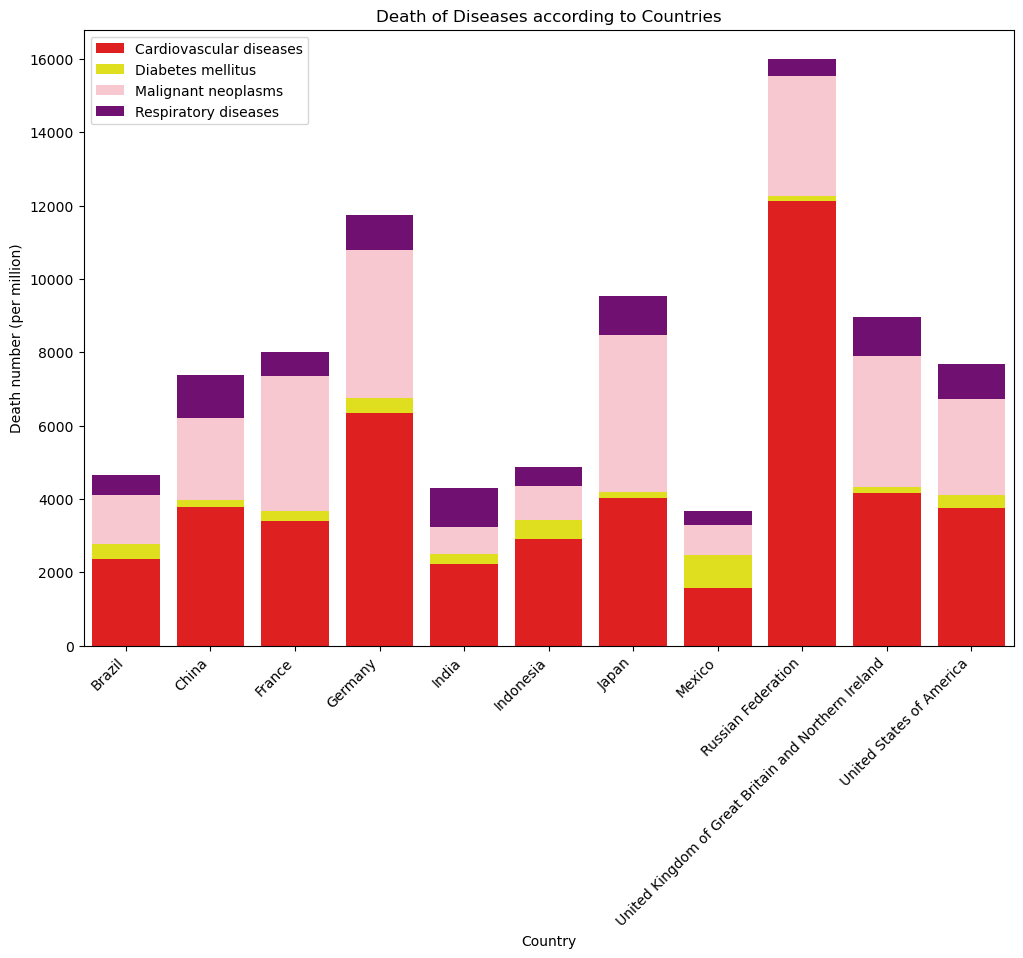

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.barplot(x=df_sliced.index, y='Cardiovascular diseases_per_million', data=df_sliced, label='Cardiovascular diseases', color='red')
sns.barplot(x=df_sliced.index, y='Diabetes mellitus_per_million', data=df_sliced, label='Diabetes mellitus', color='yellow', bottom=df_sliced['Cardiovascular diseases_per_million'])
sns.barplot(x=df_sliced.index, y='Malignant neoplasms_per_million', data=df_sliced, label='Malignant neoplasms', color='pink', bottom=df_sliced['Cardiovascular diseases_per_million'] + df_sliced['Diabetes mellitus_per_million'])
sns.barplot(x=df_sliced.index, y='Respiratory diseases_per_million', data=df_sliced, label='Respiratory diseases', color='purple', bottom=df_sliced['Cardiovascular diseases_per_million'] + df_sliced['Diabetes mellitus_per_million'] + df_sliced['Malignant neoplasms_per_million'])

plt.xlabel('Country')
plt.ylabel('Death number (per million)')
plt.title('Death of Diseases according to Countries')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()



In [22]:
# Assuming cols is a list of columns you want to access
cols = [
    'FactValueNumeric_Cardiovascular diseases',
    'FactValueNumeric.1_Diabetes mellitus',
    'FactValueNumeric.2_Malignant neoplasms',
    'FactValueNumeric.3_Respiratory diseases',
    'FactValueNumericHigh_Cardiovascular diseases',
    'FactValueNumericHigh.1_Diabetes mellitus',
    'FactValueNumericHigh.2_Malignant neoplasms',
    'FactValueNumericHigh.3_Respiratory diseases',
    'FactValueNumericLow_Cardiovascular diseases',
    'FactValueNumericLow.1_Diabetes mellitus',
    'FactValueNumericLow.2_Malignant neoplasms',
    'FactValueNumericLow.3_Respiratory diseases'
]

for a in cols:
 df_results[a] = df_results[a] / df_results['population']


df_results['GDP_per_capita']= df_results['GDP'] / df_results['population']
df_results=df_results.drop(columns=['GDP','population'])
df_results

,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP_Change,FactValueNumeric_Cardiovascular diseases,FactValueNumeric.1_Diabetes mellitus,...,FactValueNumeric.3_Respiratory diseases,FactValueNumericHigh_Cardiovascular diseases,FactValueNumericHigh.1_Diabetes mellitus,FactValueNumericHigh.2_Malignant neoplasms,FactValueNumericHigh.3_Respiratory diseases,FactValueNumericLow_Cardiovascular diseases,FactValueNumericLow.1_Diabetes mellitus,FactValueNumericLow.2_Malignant neoplasms,FactValueNumericLow.3_Respiratory diseases,GDP_per_capita
Location,,,,,,,,,,,,,,,,,,,,,
Brazil,3.658e+06,39.026,84769.232,389437.179,0.023,5263.169,0.108,1.426e+12,0.002,3.906e-04,...,5.605e-04,0.003,4.476e-04,1.494e-03,6.424e-04,0.002,3.304e-04,1.174e-03,4.744e-04,11736.497
China,3.689e+06,38.750,86079.442,394046.879,0.027,5263.174,0.113,1.484e+13,0.004,1.953e-04,...,1.181e-03,0.004,2.436e-04,2.632e-03,1.378e-03,0.003,1.517e-04,1.828e-03,9.783e-04,9178.550
France,4.186e+06,43.172,90993.642,425532.179,0.015,5263.149,0.088,8.182e+11,0.003,2.707e-04,...,6.547e-04,0.004,3.307e-04,4.446e-03,8.829e-04,0.003,2.133e-04,2.978e-03,4.865e-04,37754.569
Germany,4.088e+06,42.149,90346.332,420462.253,0.017,5263.179,0.094,1.240e+12,0.006,4.273e-04,...,9.466e-04,0.007,5.303e-04,4.707e-03,1.198e-03,0.005,3.335e-04,3.307e-03,7.612e-04,44022.732
India,3.170e+06,35.537,77791.121,352272.695,0.032,5263.153,0.132,6.912e+12,0.002,2.804e-04,...,1.053e-03,0.003,3.529e-04,9.120e-04,1.380e-03,0.002,2.175e-04,5.947e-04,7.317e-04,3996.753
Indonesia,3.292e+06,35.873,80393.300,364863.979,0.030,5263.154,0.130,2.344e+12,0.003,5.002e-04,...,5.182e-04,0.004,6.401e-04,1.279e-03,6.750e-04,0.002,3.781e-04,6.432e-04,3.845e-04,6921.926
Japan,4.334e+06,44.428,92420.437,434906.500,0.014,5263.174,0.084,2.018e+11,0.004,1.709e-04,...,1.065e-03,0.005,2.231e-04,4.712e-03,1.466e-03,0.003,1.183e-04,3.599e-03,6.954e-04,40065.713
Mexico,3.763e+06,40.040,85695.132,396266.253,0.019,5263.156,0.103,9.217e+11,0.002,9.173e-04,...,3.765e-04,0.002,1.071e-03,9.184e-04,4.321e-04,0.001,7.662e-04,7.111e-04,3.037e-04,14890.554
Russian Federation,3.222e+06,34.745,79838.905,362473.037,0.030,5263.161,0.135,2.715e+12,0.012,1.607e-04,...,4.641e-04,0.013,1.880e-04,3.505e-03,5.339e-04,0.011,1.384e-04,2.988e-03,4.234e-04,20434.522


In [23]:
df_results_norm = (df_results - df_results.mean()) / df_results.std()


In [24]:
#Apply kMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_results_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_results_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  China, India
1 :  France, Germany, Japan, United Kingdom of Great Britain and Northern Ireland, United States of America
2 :  Russian Federation
3 :  Brazil, Indonesia, Mexico


In [25]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_results_norm.columns)

#Add 'Cluster number' column

pd.set_option('display.precision', 3)
print(centroids)
#pd.set_option('display.precision', 3)

   Tx - person-years lived above age x  ex - expectation of life at age x  \
0                               -0.835                             -0.792   
1                                0.894                              0.883   
2                               -1.348                             -1.528   
3                               -0.484                             -0.434   

   lx - number of people left alive at age x  \
0                                     -0.836   
1                                      0.884   
2                                     -1.257   
3                                     -0.497   

   nLx - person-years lived between ages x and x+n  \
0                                           -0.865   
1                                            0.892   
2                                           -1.248   
3                                           -0.494   

   nMx - age-specific death rate between ages x and x+n  \
0                                          

<Figure size 800x700 with 0 Axes>

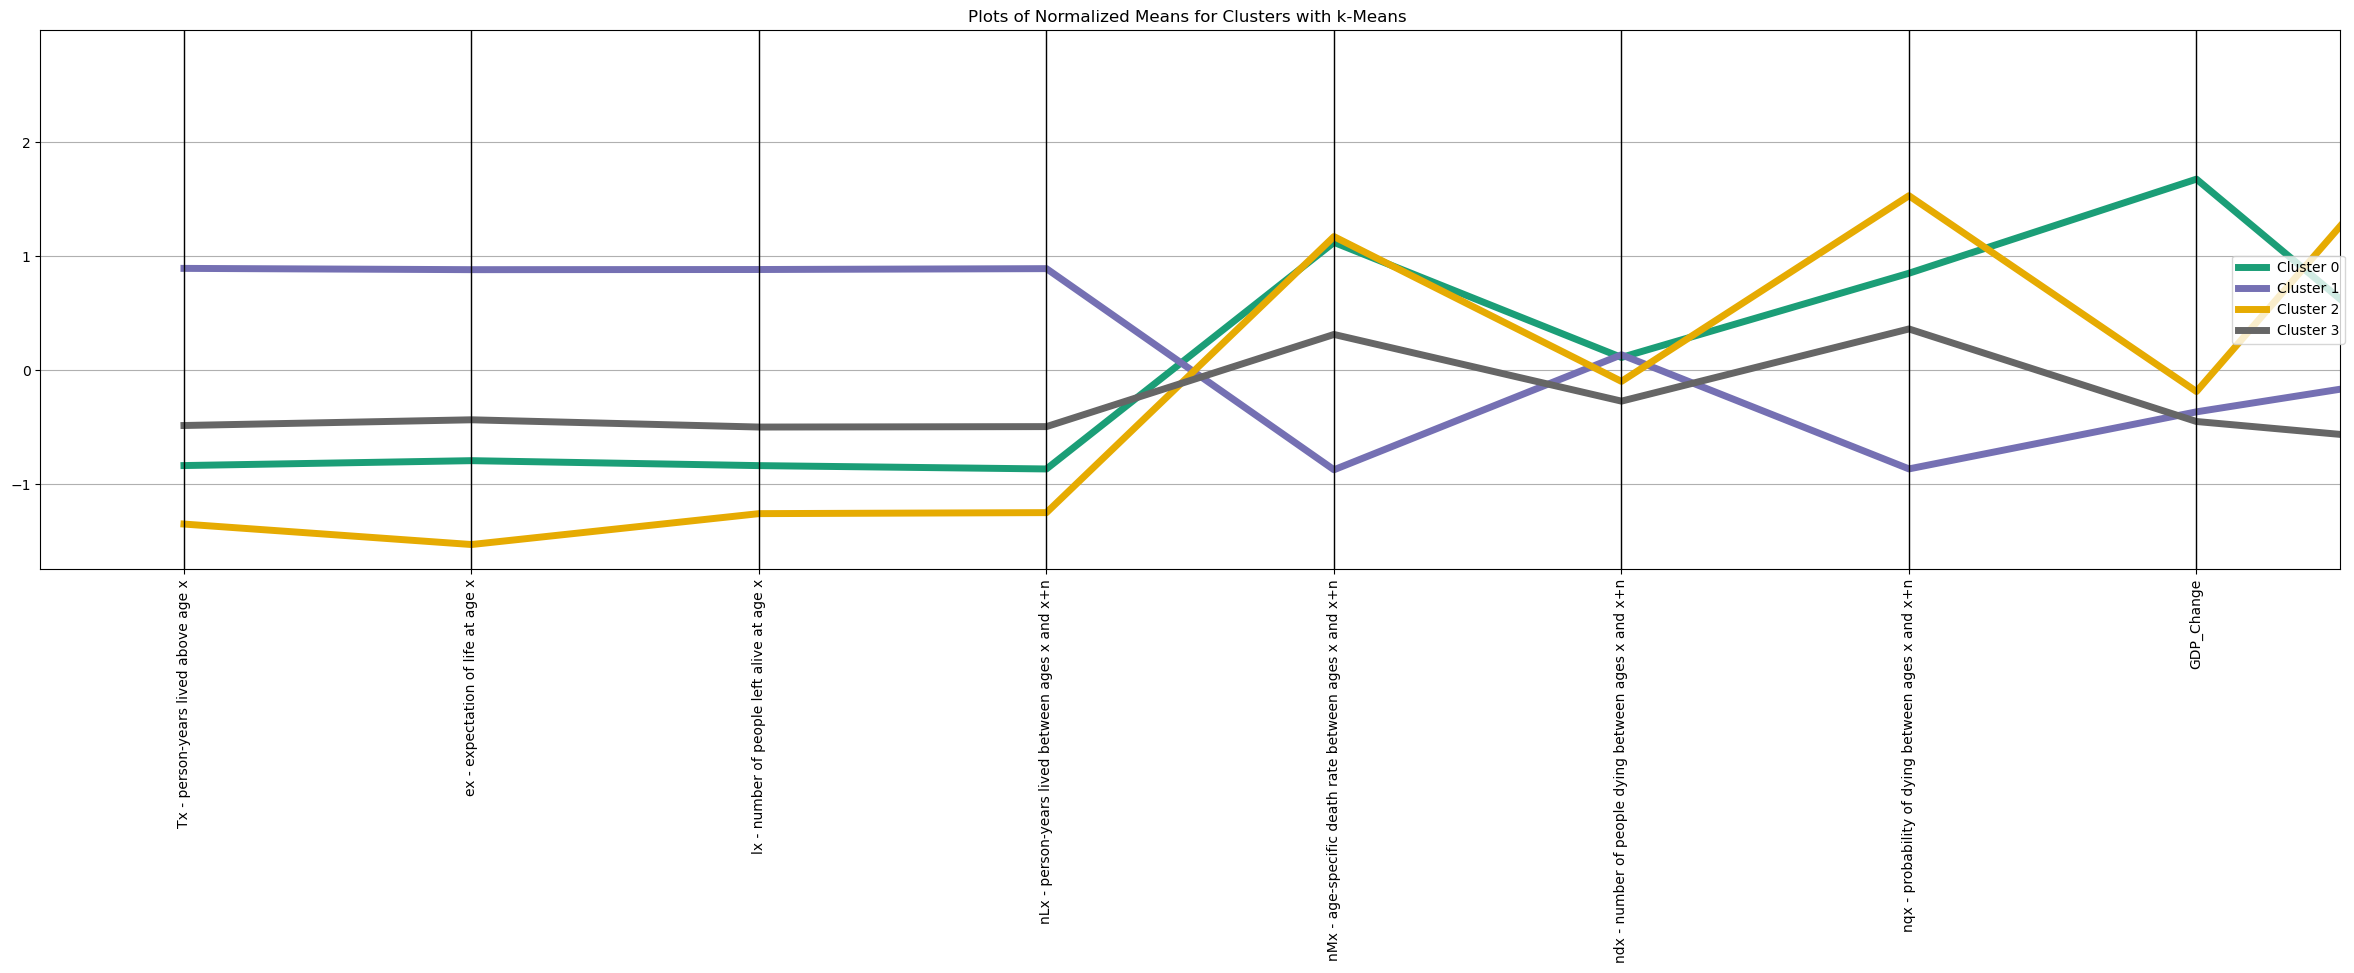

In [26]:
#Plot the means from kMeans clustering

# Create data frame with means of each normalized input variable (measurement) for each cluster 
df_results_norm.index = df_results.index
clust_mean_norm = df_results_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(8, 7))
fig = plt.figure(figsize=(8, 7))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5, 7.5)
plt.title('Plots of Normalized Means for Clusters with k-Means ')

# Rotate the cluster labels vertically
plt.xticks(rotation='vertical')

plt.show()



0 :  France, Germany, Japan, United Kingdom of Great Britain and Northern Ireland, United States of America
1 :  Brazil, Indonesia, Mexico
2 :  China, India
3 :  Russian Federation

<Figure size 800x700 with 0 Axes>

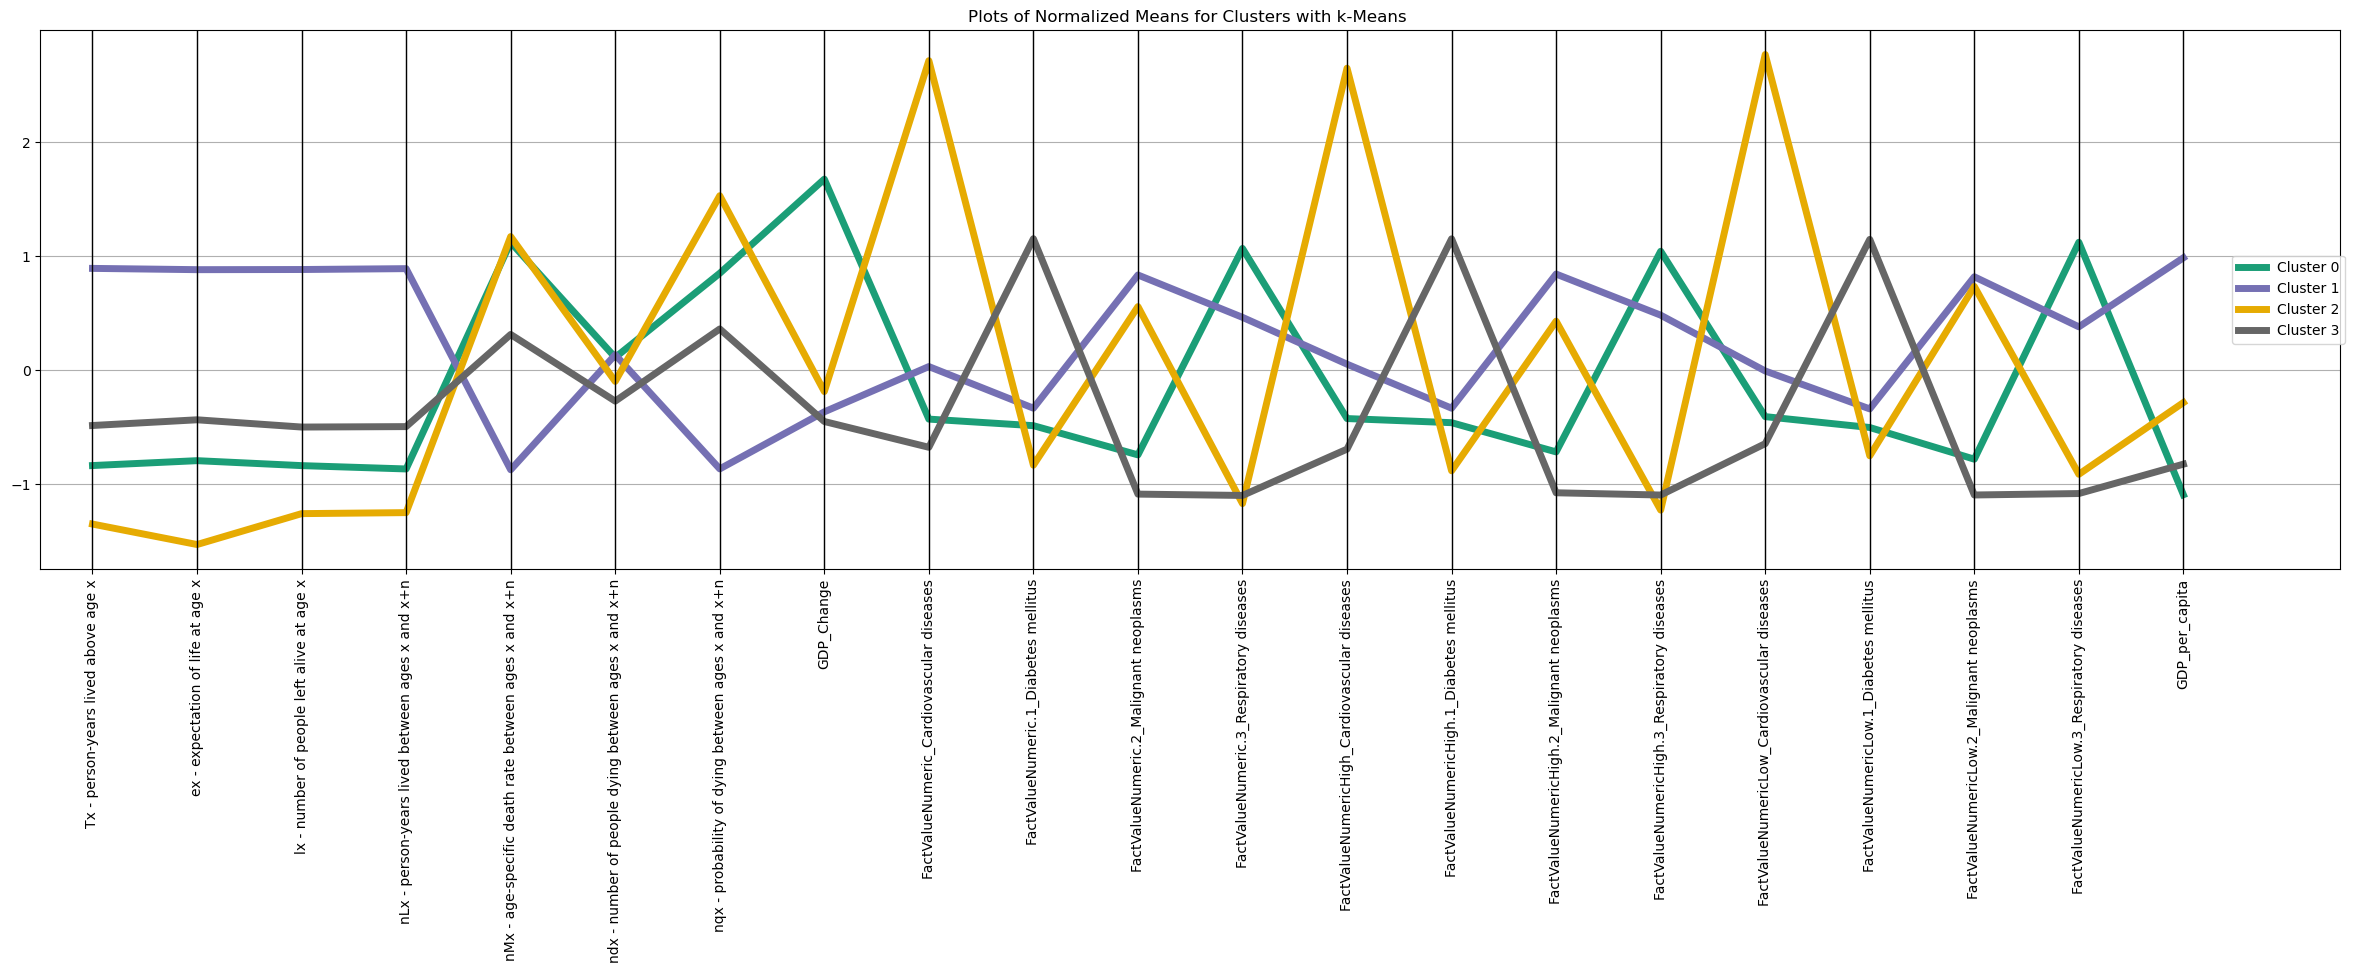

In [27]:
# Assuming df_results_norm is your DataFrame with normalized input variables
# and memb is a Series with cluster assignments
df_results_norm.index = df_results.index
clust_mean_norm = df_results_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(8, 7))
fig = plt.figure(figsize=(8, 7))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5, len(clust_mean_norm.columns) - 0.5)  # Adjust the x-axis limit based on the number of clusters
plt.title('Plots of Normalized Means for Clusters with k-Means ')

# Rotate the cluster labels vertically
plt.xticks(rotation='vertical')

plt.show()


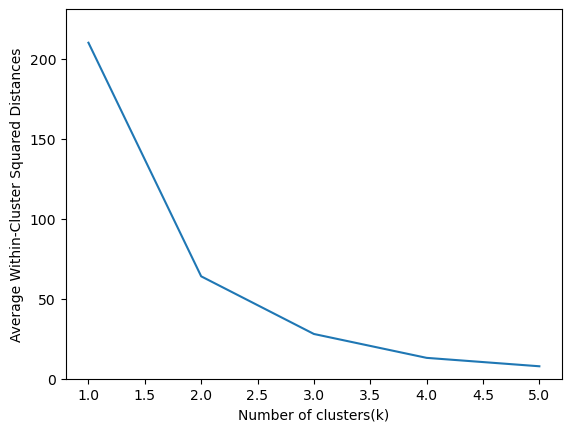

In [28]:
inertia = []
for n_clusters in range(1, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_results_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 6), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

## Cluster 0 (First World):

Countries: France, Germany, Japan, United Kingdom of Great Britain and Northern Ireland, United States of America
* Higher life expectancy (ex), lower age-specific death rates (nMx).
* Higher GDP and possibly positive GDP change.
*  Lower values in health-related factors (e.g., cardiovascular diseases, diabetes, malignant neoplasms, respiratory diseases).
* Generally more developed and healthier economies.

#### Higher rates of Malignant Neoplasms (Cancer):

* Advanced healthcare infrastructure and technology lead to better detection and reporting of cancer cases.
* Longer life expectancy increases the likelihood of developing cancer over a lifetime.
* Lifestyle factors such as diet and environmental exposures might contribute to cancer incidence.


## Cluster 1 (Mid Tier):

Countries: Brazil, Indonesia, Mexico
* Lower life expectancy, higher age-specific death rates.
* Lower GDP and possibly negative GDP change.
* Possibly higher values in health-related factors.
* Potentially representing less developed economies with health challenges.

#### Trend higher for Diabetes:

* Economic conditions may lead to dietary patterns that are conducive to diabetes.
* Limited access to healthcare facilities and education on preventive measures for diabetes.
* A potentially younger population with less emphasis on preventive health measures.


## Cluster 2 (Emerging Superpowers):

Countries: China, India
* Values in between Cluster 0 and Cluster 1 for life expectancy and age-specific death rates.
* Moderate GDP and GDP change.
* Health-related factors may vary but tend to be more moderate compared to Cluster 1.
* Represents countries with intermediate levels of development and health indicators.

#### Trend higher in Respiratory Diseases:

* Rapid industrialization and urbanization may lead to increased air pollution, contributing to respiratory diseases.
* Occupational hazards in emerging industries might expose people to respiratory risks.
* Growing urban populations may be living in crowded conditions, increasing the transmission of respiratory infections.


## Cluster 3 (Russia:

Country: Russian Federation
* Lower life expectancy and higher age-specific death rates, similar to Cluster 1.
* GDP and GDP change may vary, but likely to be lower.
* Health-related factors may show mixed patterns.
* Potentially representing a country with lower development and health challenges.

#### Higher rates of Cardiovascular Disease:
* Historical lifestyle factors, such as diet and stress, could contribute to cardiovascular issues.
* Economic challenges may limit access to healthcare services, impacting cardiovascular disease prevention and management.
* Cold climate might influence cardiovascular health, as extreme temperatures can affect blood pressure and heart function.

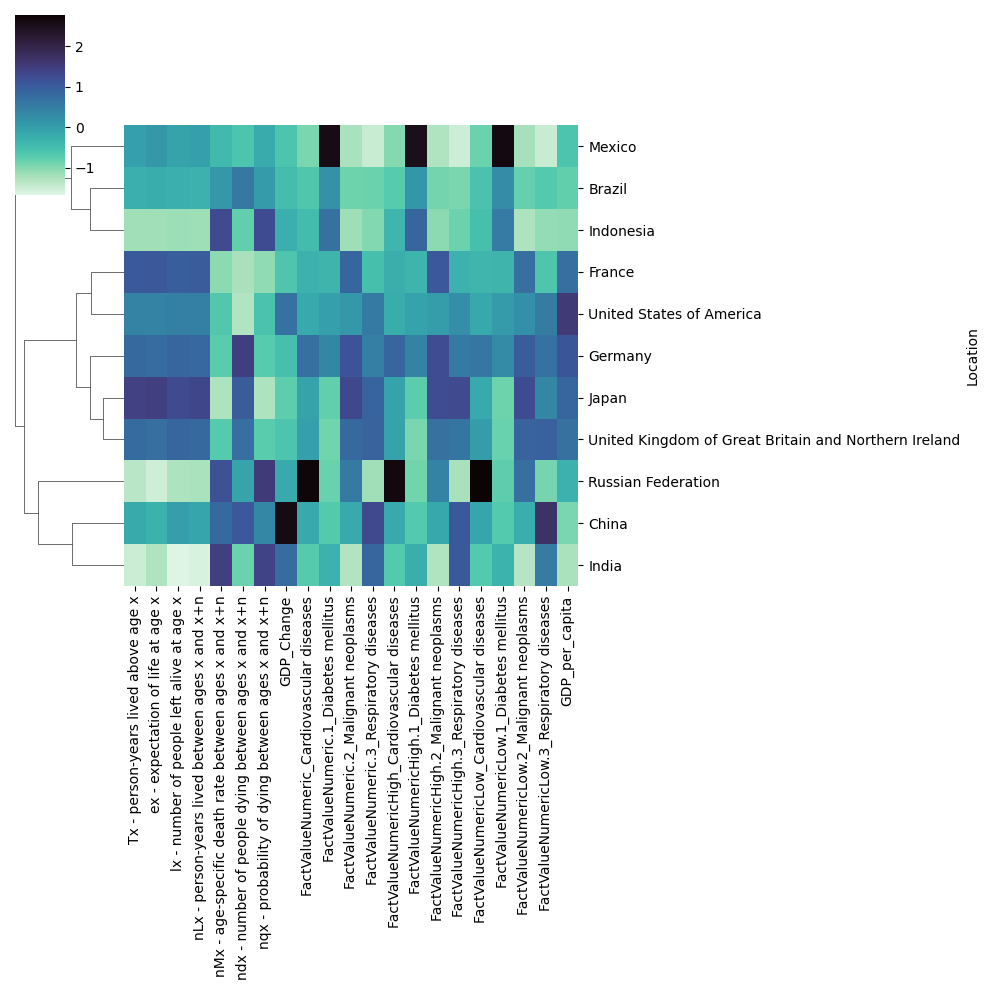

In [29]:
#Cluster map (aka Heat map)
sns.clustermap(df_results_norm, method='complete', col_cluster=False,  cmap="mako_r") #mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [30]:
# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_results_norm.index)
for key, item in memb.groupby(memb):
    #print(item.index)
    print(key, ': ', ', '.join(item.index))

0 :  Brazil, India, Indonesia
1 :  France, Germany, Japan, United Kingdom of Great Britain and Northern Ireland, United States of America
2 :  Russian Federation
3 :  China
4 :  Mexico


In [31]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [32]:
df1 = pd.read_csv('/Users/raghav/Downloads/final1.csv')
df1 = df1.drop(['Unnamed: 0', 'Region_Code', 'SpatialDimValueCode'], axis=1)
df1.nunique()

Location                                                  11
Period                                                     5
Sex                                                        2
Age_Group                                                 19
Tx - person-years lived above age x                     2090
ex - expectation of life at age x                       1832
lx - number of people left alive at age x               1861
nLx - person-years lived between ages x and x+n         2063
nMx - age-specific death rate between ages x and x+n     123
ndx - number of people dying between ages x and x+n     1992
nqx - probability of dying between ages x and x+n        149
GDP                                                       55
dtype: int64

In [33]:
df1['Age_Midpoint'] = df1['Age_Group'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1].split()[0])) / 2 if '-' in x else (0.5 if '<' in x else (85 if '>' in x else int(x.split('+')[0]))))
df1

,Location,Period,Sex,Age_Group,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,Age_Midpoint
0,Brazil,2000,Female,1-4 years,7.421e+06,76.18,97402.0,388666.0,1.000e-03,392.3,0.004,1653572400000,2.5
1,Brazil,2000,Female,10-14 years,6.547e+06,67.58,96875.0,484035.0,3.000e-04,137.0,0.001,1653572400000,12.0
2,Brazil,2000,Female,15-19 years,6.063e+06,62.68,96739.0,483101.0,5.000e-04,236.7,0.002,1653572400000,17.0
3,Brazil,2000,Female,20-24 years,5.580e+06,57.82,96502.0,481748.0,6.000e-04,304.5,0.003,1653572400000,22.0
4,Brazil,2000,Female,25-29 years,5.098e+06,53.00,96197.0,480046.0,8.000e-04,376.4,0.004,1653572400000,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,1.345e+06,15.97,84223.0,402477.0,1.900e-02,7455.0,0.089,5036891000000,72.0
2086,Japan,2019,Male,75-79 years,9.429e+05,12.28,76768.0,354743.0,3.300e-02,11638.0,0.150,5036891000000,77.0
2087,Japan,2019,Male,80-84 years,5.882e+05,9.03,65130.0,282238.0,6.200e-02,17364.0,0.270,5036891000000,82.0
2088,Japan,2019,Male,85+ years,3.059e+05,6.41,47765.0,305948.0,1.400e-01,47765.0,1.000,5036891000000,85.0


In [34]:
df1['LifeExpectancy'] = df1['Age_Midpoint'] + df1['ex - expectation of life at age x']
df2 = df1[['Location', 'Period', 'Sex', 'Age_Group', 'LifeExpectancy','GDP']]

In [35]:
# Create a DataFrame from the population_data dictionary
population_data = {
    'Location': ['Brazil', 'Mexico', 'United States of America', 'Germany', 'France', 'United Kingdom of Great Britain and Northern Ireland', 'Russian Federation', 'Indonesia', 'India', 'China', 'Japan'],
    'population': [213993437, 130262216, 332915073, 83166711, 67648621, 68207116, 145912025, 276361783, 1393409038, 1444216107, 126050804],
}
population_df = pd.DataFrame(population_data)
population_df = population_df.set_index('Location')
population_df

,population
Location,
Brazil,213993437
Mexico,130262216
United States of America,332915073
Germany,83166711
France,67648621
United Kingdom of Great Britain and Northern Ireland,68207116
Russian Federation,145912025
Indonesia,276361783
India,1393409038


In [36]:
df2 = df2.merge(population_df, how='left', on='Location')
df2

,Location,Period,Sex,Age_Group,LifeExpectancy,GDP,population
0,Brazil,2000,Female,1-4 years,78.68,1653572400000,213993437
1,Brazil,2000,Female,10-14 years,79.58,1653572400000,213993437
2,Brazil,2000,Female,15-19 years,79.68,1653572400000,213993437
3,Brazil,2000,Female,20-24 years,79.82,1653572400000,213993437
4,Brazil,2000,Female,25-29 years,80.00,1653572400000,213993437
...,...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,87.97,5036891000000,126050804
2086,Japan,2019,Male,75-79 years,89.28,5036891000000,126050804
2087,Japan,2019,Male,80-84 years,91.03,5036891000000,126050804
2088,Japan,2019,Male,85+ years,91.41,5036891000000,126050804


In [37]:
df2['population'] = df2['population'].astype('int')
df2.head()

,Location,Period,Sex,Age_Group,LifeExpectancy,GDP,population
0,Brazil,2000,Female,1-4 years,78.68,1653572400000,213993437
1,Brazil,2000,Female,10-14 years,79.58,1653572400000,213993437
2,Brazil,2000,Female,15-19 years,79.68,1653572400000,213993437
3,Brazil,2000,Female,20-24 years,79.82,1653572400000,213993437
4,Brazil,2000,Female,25-29 years,80.00,1653572400000,213993437


In [38]:
df2['GDP'] = df2['GDP']/df2['population']
df2.head()

,Location,Period,Sex,Age_Group,LifeExpectancy,GDP,population
0,Brazil,2000,Female,1-4 years,78.68,7727.211,213993437
1,Brazil,2000,Female,10-14 years,79.58,7727.211,213993437
2,Brazil,2000,Female,15-19 years,79.68,7727.211,213993437
3,Brazil,2000,Female,20-24 years,79.82,7727.211,213993437
4,Brazil,2000,Female,25-29 years,80.00,7727.211,213993437


In [39]:
df2.drop(columns = 'population')

,Location,Period,Sex,Age_Group,LifeExpectancy,GDP
0,Brazil,2000,Female,1-4 years,78.68,7727.211
1,Brazil,2000,Female,10-14 years,79.58,7727.211
2,Brazil,2000,Female,15-19 years,79.68,7727.211
3,Brazil,2000,Female,20-24 years,79.82,7727.211
4,Brazil,2000,Female,25-29 years,80.00,7727.211
...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,87.97,39959.214
2086,Japan,2019,Male,75-79 years,89.28,39959.214
2087,Japan,2019,Male,80-84 years,91.03,39959.214
2088,Japan,2019,Male,85+ years,91.41,39959.214


In [40]:
df2['GDP'] = (df2['GDP'] - df2['GDP'].mean()) / df2['GDP'].std()
df2

,Location,Period,Sex,Age_Group,LifeExpectancy,GDP,population
0,Brazil,2000,Female,1-4 years,78.68,-1.039,213993437
1,Brazil,2000,Female,10-14 years,79.58,-1.039,213993437
2,Brazil,2000,Female,15-19 years,79.68,-1.039,213993437
3,Brazil,2000,Female,20-24 years,79.82,-1.039,213993437
4,Brazil,2000,Female,25-29 years,80.00,-1.039,213993437
...,...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,87.97,0.869,126050804
2086,Japan,2019,Male,75-79 years,89.28,0.869,126050804
2087,Japan,2019,Male,80-84 years,91.03,0.869,126050804
2088,Japan,2019,Male,85+ years,91.41,0.869,126050804


In [41]:
features = df2[['Location', 'Period', 'Sex', 'GDP']]
target = df2['LifeExpectancy']

In [42]:
features = pd.get_dummies(features)

In [43]:
x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size=0.3, random_state=0)
print('Training_Feature   : ', x_train.shape)
print('Training_Target : ', y_train.shape)

Training_Feature   :  (1463, 15)
Training_Target :  (1463,)


FORECASTING

In [44]:
#Multiple Linear Model
LM = LinearRegression()
LM.fit(x_train, y_train)
regressionSummary(y_valid, LM.predict(x_valid))
r2_score(y_valid, LM.predict(x_valid))


Regression statistics

                      Mean Error (ME) : -0.2055
       Root Mean Squared Error (RMSE) : 4.3424
            Mean Absolute Error (MAE) : 3.2441
          Mean Percentage Error (MPE) : -0.5694
Mean Absolute Percentage Error (MAPE) : 4.0379


0.4692444802611536

In [58]:
#Decision Tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
regressionSummary(y_valid, tree.predict(x_valid))
r2_score(y_valid, tree.predict(x_valid))


Regression statistics

                      Mean Error (ME) : -0.2528
       Root Mean Squared Error (RMSE) : 4.4556
            Mean Absolute Error (MAE) : 3.3431
          Mean Percentage Error (MPE) : -0.6230
Mean Absolute Percentage Error (MAPE) : 4.1458


0.44121366787968064

In [59]:
#K-Nearest Neighbours (KNN)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
regressionSummary(y_valid, knn.predict(x_valid))
r2_score(y_valid, knn.predict(x_valid))


Regression statistics

                      Mean Error (ME) : -0.3306
       Root Mean Squared Error (RMSE) : 4.6531
            Mean Absolute Error (MAE) : 3.4853
          Mean Percentage Error (MPE) : -0.7269
Mean Absolute Percentage Error (MAPE) : 4.3368


0.3905636117087221

In [60]:
#2030 DataFrame
countries = ['Brazil', 'Mexico', 'United States of America', 'Germany', 'France', 'United Kingdom of Great Britain and Northern Ireland', 'Russian Federation', 'Indonesia', 'India', 'China', 'Japan']
sexes = ['Male', 'Female']
gdp_values = [8600000000000, 3600000000000, 31000000000000, 6900000000000, 3800000000000, 4500000000000,  7900000000000, 10100000000000, 46300000000000, 64200000000000, 7200000000000]
gdp_values = np.array(gdp_values)
gdp_values = (gdp_values - gdp_values.mean()) / gdp_values.std()
df_2030 = pd.DataFrame({
    'Location': [country for country in countries for _ in range(len(sexes))],
    'Period': [2030]*len(countries)*len(sexes),
    'Sex': sexes*len(countries),
    'GDP': [value for value in gdp_values for _ in range(len(sexes))]

})
df_2030

,Location,Period,Sex,GDP
0,Brazil,2030,Male,-0.464
1,Brazil,2030,Female,-0.464
2,Mexico,2030,Male,-0.720
3,Mexico,2030,Female,-0.720
4,United States of America,2030,Male,0.685
5,United States of America,2030,Female,0.685
6,Germany,2030,Male,-0.551
7,Germany,2030,Female,-0.551
8,France,2030,Male,-0.710
9,France,2030,Female,-0.710


In [61]:
#Multiple Linear Regression
df_2030_ = pd.get_dummies(df_2030)
life_expectancy_2030 = LM.predict(df_2030_)

In [62]:
df_2030['LifeExpectancy'] = life_expectancy_2030
df_2030 = df_2030.sort_values(by='GDP', ascending = False)
df_2030

,Location,Period,Sex,GDP,LifeExpectancy
19,China,2030,Female,2.386,88.603
18,China,2030,Male,2.386,84.510
17,India,2030,Female,1.469,85.004
16,India,2030,Male,1.469,80.911
4,United States of America,2030,Male,0.685,82.089
5,United States of America,2030,Female,0.685,86.181
15,Indonesia,2030,Female,-0.387,82.942
14,Indonesia,2030,Male,-0.387,78.850
0,Brazil,2030,Male,-0.464,81.596
1,Brazil,2030,Female,-0.464,85.688


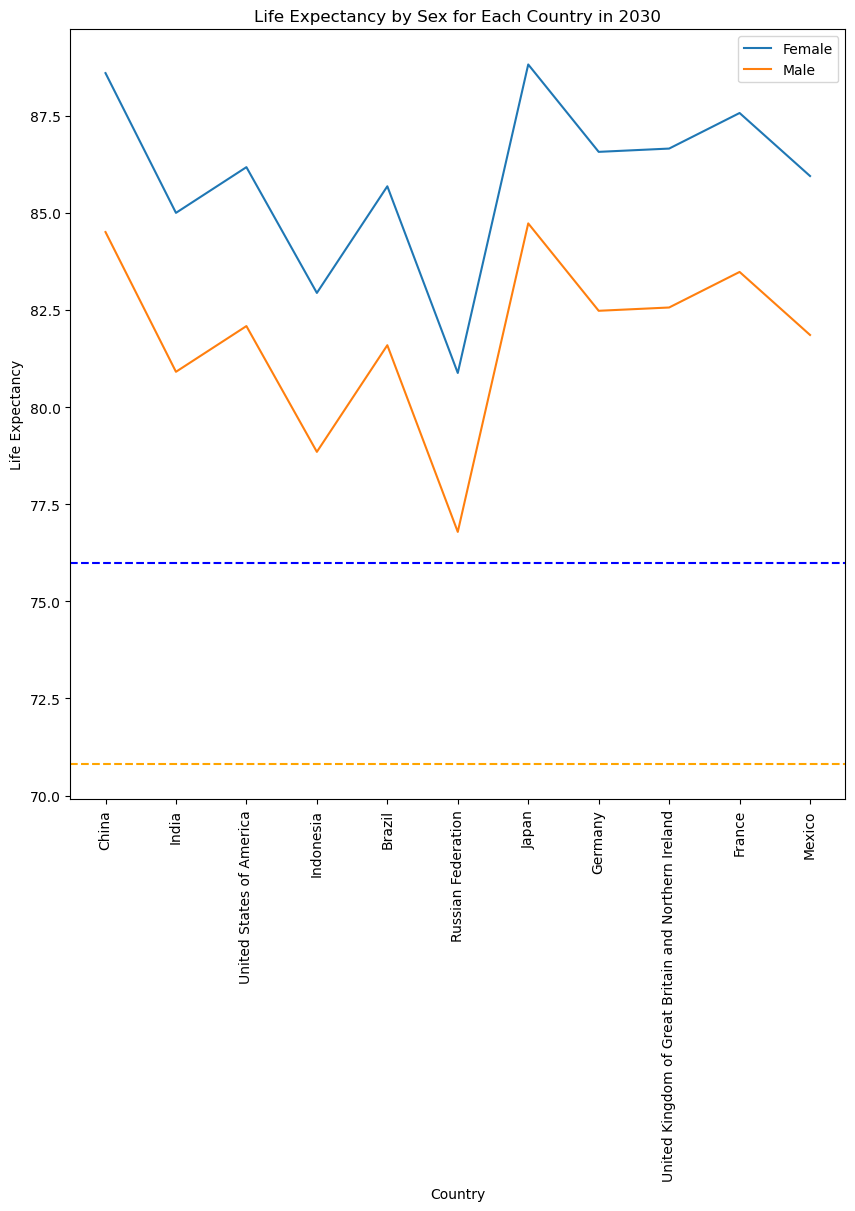

In [68]:
df2_sorted = df_2030.sort_values('GDP', ascending = False)

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 10))

# Create a line plot using seaborn
sns.lineplot(x='Location', y='LifeExpectancy', hue='Sex', data=df2_sorted, ci=None, ax=ax)

ax.axhline(y=70.8, color='orange', linestyle='--') 
ax.axhline(y=76, color='blue', linestyle='--') 

# Create labels
ax.set_xlabel('Country')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy by Sex for Each Country in 2030')
plt.xticks(rotation=90)
ax.legend(loc='upper right')

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


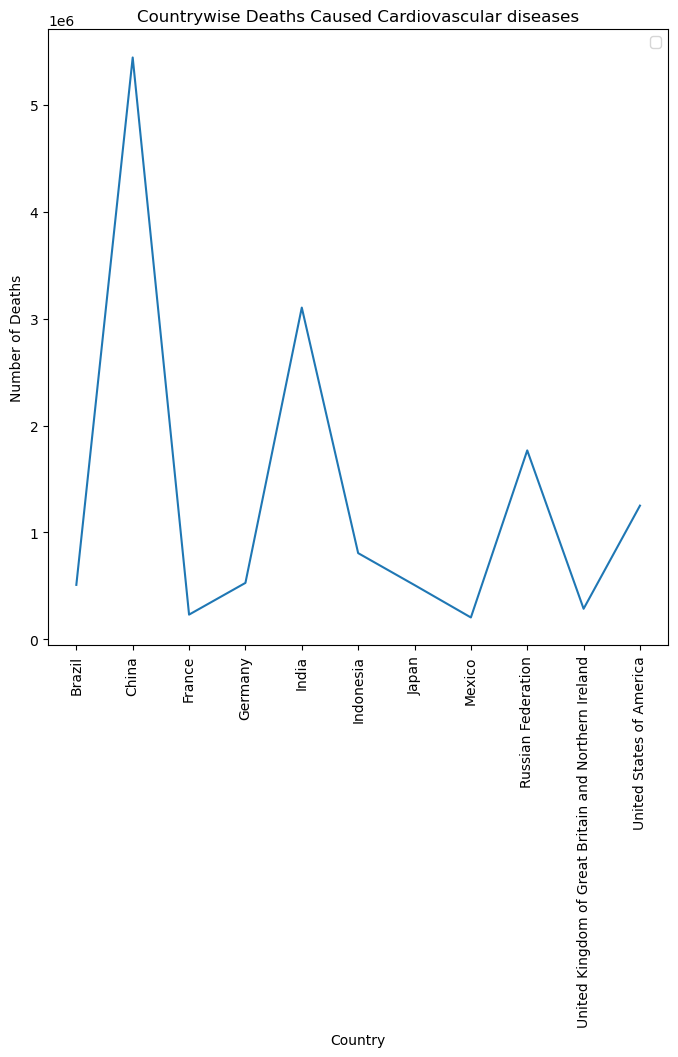

In [69]:
plt.figure(figsize=(8, 8))

# Create a bar plot using seaborn
sns.lineplot(x='Location', y='FactValueNumeric_Cardiovascular diseases', data=df_comm_agg, ci=None)

# Create labels
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Countrywise Deaths Caused Cardiovascular diseases')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


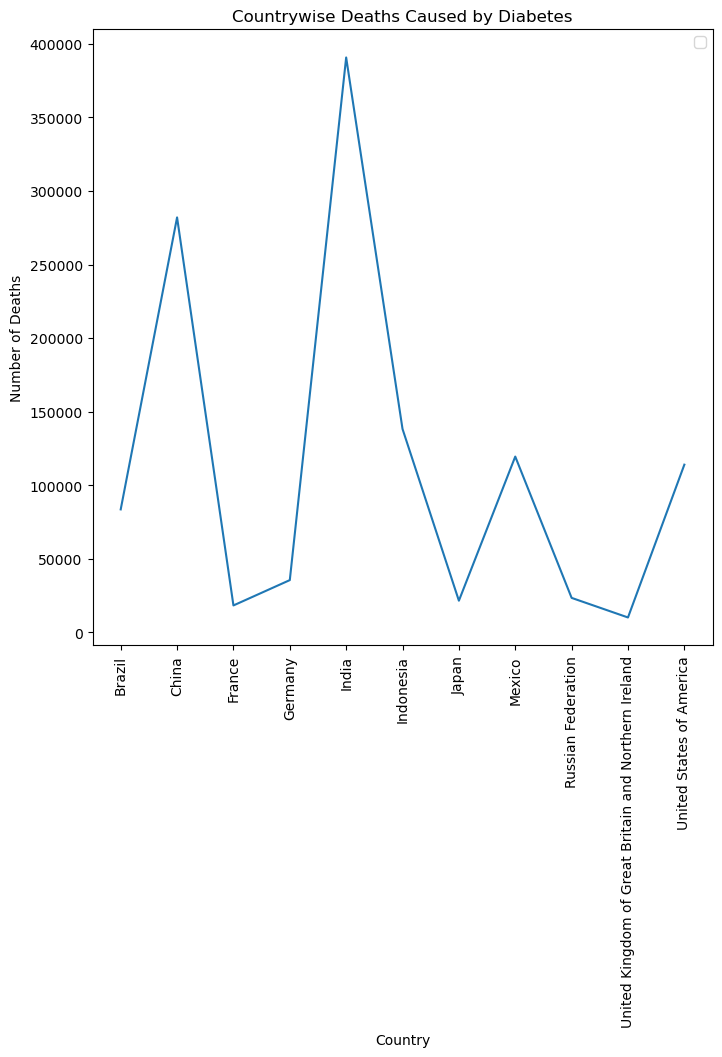

In [70]:
plt.figure(figsize=(8, 8))

# Create a bar plot using seaborn
sns.lineplot(x='Location', y='FactValueNumeric.1_Diabetes mellitus', data=df_comm_agg, ci=None)

# Create labels
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Countrywise Deaths Caused by Diabetes')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


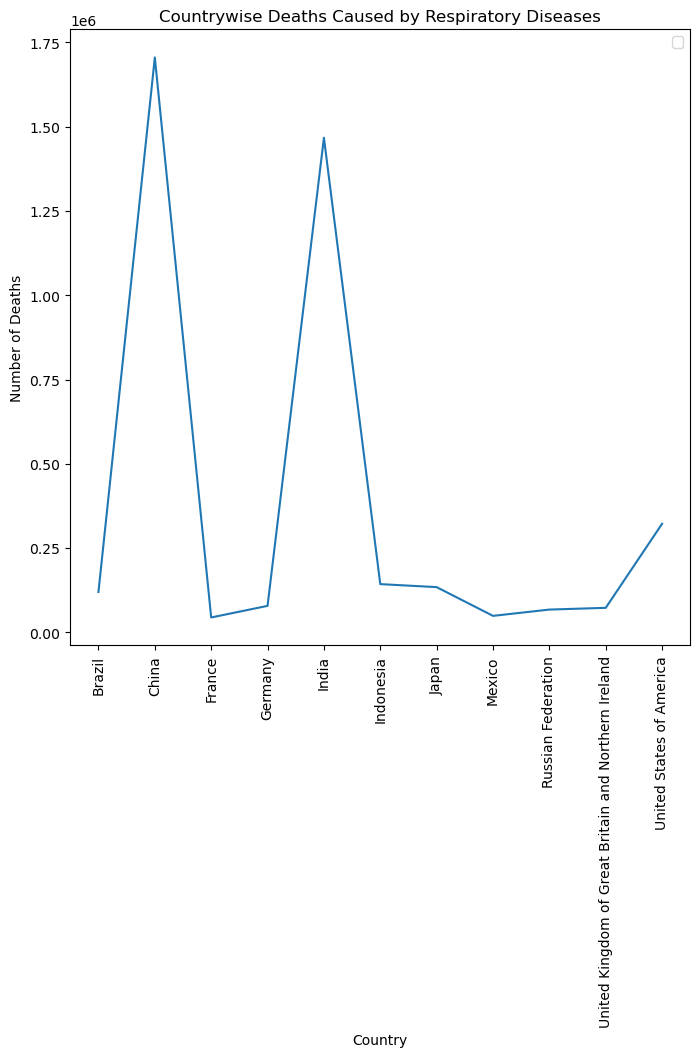

In [71]:
plt.figure(figsize=(8, 8))

# Create a bar plot using seaborn
sns.lineplot(x='Location', y='FactValueNumeric.3_Respiratory diseases', data=df_comm_agg, ci=None)

# Create labels
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Countrywise Deaths Caused by Respiratory Diseases')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
# Show the plot
plt.show()